<a href="https://colab.research.google.com/github/yejin0455/sesac-python/blob/main/%ED%86%B5%EA%B3%84%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80_vs_KNN%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

선형회귀 vs KNN회귀

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
n = 1000
heights = np.random.normal(174, 8, n)  #평균, 표준편차, 만들 데이터 개수

In [20]:
heights2 = [height//5 for height in heights]
se = pd.Series(heights2)
svc = se.value_counts()

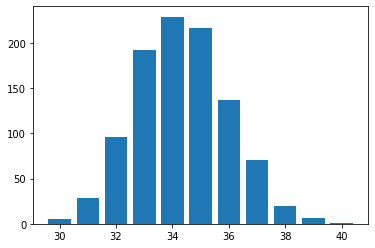

In [21]:
plt.bar(svc.index, svc.values)
plt.show()

In [22]:
bmi = np.random.normal(21, 1, n)
weights = bmi * (heights**2) / 10000  #키의 단위를 m로 바꿔줌

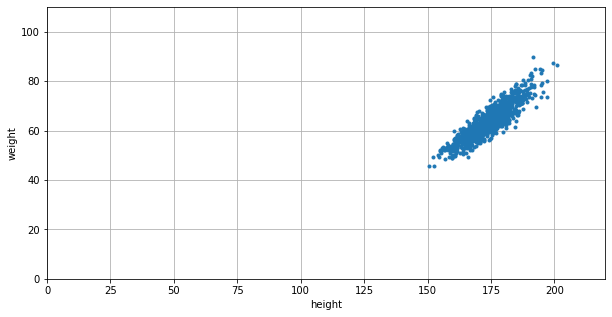

In [24]:
plt.figure(figsize=(10, 5))
plt.plot(heights, weights, '.')
plt.xlabel("height")
plt.ylabel("weight")
plt.xlim(0, 220)
plt.ylim(0, 110)
plt.grid(True)
plt.show()

In [25]:
#xs = [[weight] for weight in weights]
xs = weights.reshape(-1, 1)  #독립변수는 여러 개의 특성으로 구성할 수 있어서 ML모델에서는 2차원 배열 형태로 학습 데이터를 입력받음
xs.shape

(1000, 1)

In [45]:
xs2 = xs.reshape(5, 20, -1)
xs2.shape

(5, 20, 10)

In [ ]:
xs3 = xs.reshape(3, 20, -1)  #1000개를 3*20*n으로
xs3.shape

In [26]:
ys = heights  #종속변수는 하나의 값이며 ML모델에서 1차원 배열 형태로 학습 데이터를 입력받음
ys.shape

(1000,)

In [28]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()  #모델 개체 생성
lr_model.fit(xs, ys)  #학습
lr_model.coef_, lr_model.intercept_  #가중치, 편향

(array([1.06724835]), 105.99609519623083)

In [31]:
txs = np.array([[50], [60], [67], [70], [94]])

In [32]:
pred_val1 = lr_model.predict(txs)  #예측
pred_val1

array([159.35851285, 170.03099638, 177.50173485, 180.70347991,
       206.31744039])

In [36]:
from sklearn.neighbors import KNeighborsRegressor
knr_model = KNeighborsRegressor()  #모델 개체 생성
knr_model.fit(xs, ys)  #학습
pred_val2 = knr_model.predict(txs)  #예측하시오
pred_val2

array([159.15773236, 168.49209124, 177.4551981 , 179.98120144,
       195.81831933])

In [34]:
from sklearn.model_selection import train_test_split
train_xs, test_xs, train_ys, test_ys = train_test_split(xs, ys, train_size=0.8)
train_xs.shape, test_xs.shape, train_ys.shape, test_ys.shape

((800, 1), (200, 1), (800,), (200,))

In [35]:
lr_model = LinearRegression()  #모델 개체 생성
lr_model.fit(xs, ys)  #학습
train_score = lr_model.score(train_xs, train_ys)  #평가하시오
test_score = lr_model.score(test_xs, test_ys)  #평가하시오
train_score, test_score

(0.7912171731927499, 0.7961322000674276)

In [37]:
knr_model = KNeighborsRegressor()  #모델 개체 생성
knr_model.fit(xs, ys)  #학습
train_score = knr_model.score(train_xs, train_ys)  #평가하시오
test_score = knr_model.score(test_xs, test_ys)  #평가하시오
train_score, test_score

(0.8392952778791891, 0.8454113895746934)

# KNN에서 주의할 점

In [41]:
pv1 = lr_model.predict([[35], [82], [85], [90], [100], [108], [120], [130]])
pv2 = knr_model.predict([[35], [82], [85], [90], [100], [108], [120], [130]])
pv1, pv2

(array([143.34978755, 193.51046015, 196.71220521, 202.04844697,
        212.7209305 , 221.25891733, 234.06589757, 244.7383811 ]),
 array([155.88899518, 190.88933406, 194.79036723, 195.81831933,
        195.81831933, 195.81831933, 195.81831933, 195.81831933]))

In [42]:
weights.max()

89.65578249359949

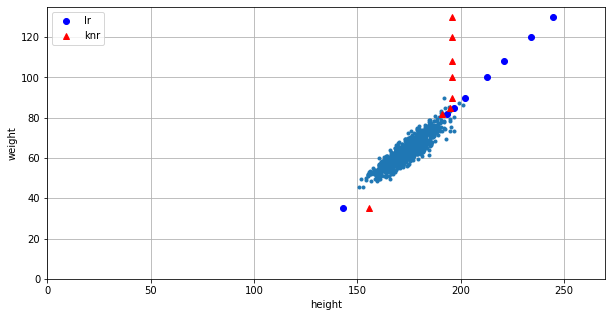

In [44]:
plt.figure(figsize=(10, 5))
plt.plot(heights, weights, '.')
plt.plot([143.34, 193.51, 196.71, 202.04, 212.72, 221.25, 234.06, 244.73], [35, 82, 85, 90, 100, 108, 120, 130], 'bo', label='lr')
plt.plot([155.88, 190.88, 194.79, 195.81, 195.81, 195.81, 195.81, 195.81], [35, 82, 85, 90, 100, 108, 120, 130], 'r^', label='knr')
plt.xlabel("height")
plt.ylabel("weight")
plt.xlim(0, 270)
plt.ylim(0, 135)
plt.grid(True)
plt.legend()
plt.show()